In [1]:
from lxml.proxy import c_str
from sklearn.linear_model import LinearRegression
from itertools import product
import pandas as pd
import numpy as np
import matplotlib.style
import matplotlib.pyplot as plt
import yfinance as yf

pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn-v0_8")
from itertools import product

In [60]:
symbol = "EURUSD=X"
start = "2019-01-01"
end = "2020-01-01"
interval = '1d'
lags=5

In [61]:
df = yf.download(symbol, start, end, interval=interval).Close.to_frame()
df.rename(columns={"Close": "price"}, inplace=True)
df['returns'] = np.log(df['price'].div(df['price'].shift(1)))
df

[*********************100%%**********************]  1 of 1 completed


,price,returns
Date,,
2019-01-01,1.149306,NaN
2019-01-02,1.146171,-0.002732
2019-01-03,1.131811,-0.012608
2019-01-04,1.139108,0.006427
2019-01-07,1.141044,0.001699
...,...,...
2019-12-25,1.109016,-0.000333
2019-12-26,1.109545,0.000477
2019-12-27,1.110112,0.000510


In [62]:
cols = []
for lag in range(1, lags+1):
    col = "lag{}".format(lag)
    df[col] = df.returns.shift(lag)
    cols.append(col)
df.dropna(inplace=True)
df

,price,returns,lag1,lag2,lag3,lag4,lag5
Date,,,,,,,
2019-01-09,1.145607,-0.002064,0.006054,0.001699,0.006427,-0.012608,-0.002732
2019-01-10,1.155495,0.008594,-0.002064,0.006054,0.001699,0.006427,-0.012608
2019-01-11,1.151013,-0.003886,0.008594,-0.002064,0.006054,0.001699,0.006427
2019-01-14,1.146014,-0.004353,-0.003886,0.008594,-0.002064,0.006054,0.001699
2019-01-15,1.147289,0.001112,-0.004353,-0.003886,0.008594,-0.002064,0.006054
...,...,...,...,...,...,...,...
2019-12-25,1.109016,-0.000333,0.001264,-0.004153,0.000901,-0.003184,0.001293
2019-12-26,1.109545,0.000477,-0.000333,0.001264,-0.004153,0.000901,-0.003184
2019-12-27,1.110112,0.000510,0.000477,-0.000333,0.001264,-0.004153,0.000901


In [63]:
cols

['lag1', 'lag2', 'lag3', 'lag4', 'lag5']

In [64]:
lm = LinearRegression(fit_intercept=True)
lm.fit(df[cols], df['returns'])

LinearRegression()

In [65]:
lm.coef_

array([-0.03413336,  0.03587359, -0.00496702, -0.10037339, -0.03295592])

In [66]:
lm.intercept_

np.float64(-0.00011338780393662959)

In [67]:
df['pred'] = lm.predict(df[cols].values)

C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [68]:
df.pred = np.sign(df.pred)
df

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
Date,,,,,,,,
2019-01-09,1.145607,-0.002064,0.006054,0.001699,0.006427,-0.012608,-0.002732,1.000000
2019-01-10,1.155495,0.008594,-0.002064,0.006054,0.001699,0.006427,-0.012608,-1.000000
2019-01-11,1.151013,-0.003886,0.008594,-0.002064,0.006054,0.001699,0.006427,-1.000000
2019-01-14,1.146014,-0.004353,-0.003886,0.008594,-0.002064,0.006054,0.001699,-1.000000
2019-01-15,1.147289,0.001112,-0.004353,-0.003886,0.008594,-0.002064,0.006054,-1.000000
...,...,...,...,...,...,...,...,...
2019-12-25,1.109016,-0.000333,0.001264,-0.004153,0.000901,-0.003184,0.001293,-1.000000
2019-12-26,1.109545,0.000477,-0.000333,0.001264,-0.004153,0.000901,-0.003184,-1.000000
2019-12-27,1.110112,0.000510,0.000477,-0.000333,0.001264,-0.004153,0.000901,1.000000


In [69]:
df.pred.value_counts()

pred
-1.000000    157
1.000000      97
Name: count, dtype: int64

In [70]:
hits = np.sign(df.returns*df.pred).value_counts()
hits

1.000000     133
-1.000000    121
Name: count, dtype: int64

In [71]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

np.float64(0.5236220472440944)

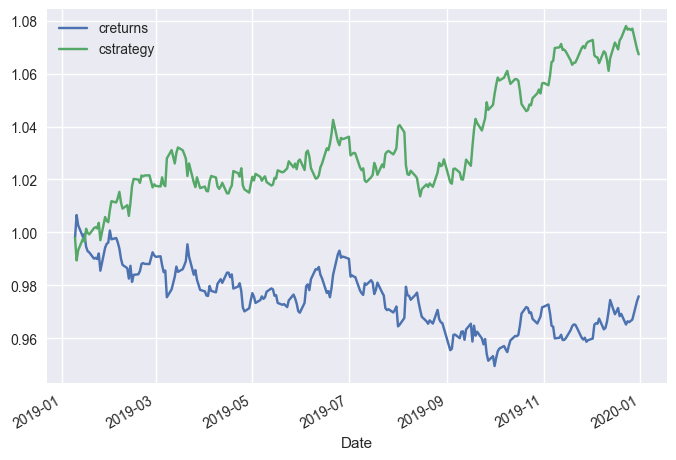

In [72]:
df['strategy'] = df.pred * df.returns
df['creturns'] = df['returns'].cumsum().apply(np.exp)
df['cstrategy'] = df['strategy'].cumsum().apply(np.exp)
df[['creturns', 'cstrategy']].plot()
plt.show()

In [73]:
df['trades'] = df.pred.diff().fillna(0).abs()
df.trades.value_counts()

trades
0.000000    143
2.000000    111
Name: count, dtype: int64